### Ваша задача  

при помощи этих шагов и рекомендаций повысить качество предсказания. Чтобы понять, что качество улучшилось, ориентируйтесь на метрику MAPE: чем она меньше, тем лучше. Рассмотрим шаги подробнее.

СТРОКОВЫЕ ДАННЫЕ

В исходном наборе данных всего девять столбцов содержат числовые данные. Так что просто удалить все object-значения и считать задачу выполненной не получится. Мы сделали это в прошлом юните, чтобы получить значение метрики. Но чтобы улучшить качество модели, вам перед удалением придётся очень основательно поработать со строковыми данными и извлечь из них как можно больше информации, которую можно представить в числовом виде.

ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ

Мы уже говорили о том, что в задачах по машинному обучению принято не удалять строки с пустыми значениями, а заполнять их максимально близкими к реальности данными. Используйте знания из модулей очистки данных или вспомните о мере центральной тенденции в юнитах статистики. Попробуйте различные способы и ориентируйтесь на итоговую метрику.

НОВЫЕ ПРИЗНАКИ

Это, пожалуй, самая творческая часть работы на данном шаге. Создание новых признаков потребует от вас способности вникать в контент, умения подключать к работе интуицию, творческого подхода и готовности к экспериментам. Попробуйте извлечь несколько признаков из даты, проанализируйте датасет на возможность добавления внешних источников данных. При наличии времени разберите текстовые столбцы на признаки.

ПРЕОБРАЗОВАНИЕ ПРИЗНАКОВ

Данные могут быть представлены в невыгодном для модели свете. Используйте изученные вами способы преобразования данных, чтобы сделать данные качественнее.

ОТБОР ПРИЗНАКОВ

Признаки могут дублировать информацию. Анализ мультиколлинеарности мы будем использовать, чтобы выбрать уникальные признаки для модели.

Также перед обучением (после разделения выборки на X и y) мы можем оценить значимость каждого признака для целевой переменной — рейтинг отеля. При помощи теста мы сможем узнать, как географическая долгота отеля и количество негативных отзывов влияют на его рейтинг.


Предоставленные данные чистые, без накруток

### Импорт библиотек и знакомство с данными

In [12]:
import pandas as pd

from sklearn.model_selection import train_test_split  # инструмент для разбивки
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели 
from sklearn.feature_selection import chi2 # хи-квадрат
from sklearn.feature_selection import f_classif # anova

In [13]:
hotels = pd.read_csv('hotels.csv') # данные чистые, без накруток
hotels = hotels.copy()

In [14]:
display(hotels.sort_values(['review_date']).head(2))
display(hotels['tags'].nunique())
display(hotels.shape)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
125579,41 rue de Clichy 9th arr 75009 Paris France,71,1/1/2016,9.1,H tel R de Paris Boutique Hotel,Belgium,No Negative,0,533,rooms breakfast personel location everything ...,10,3,10.0,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",580 day,48.879924,2.328833
80627,Llull 340 Sant Mart 08019 Barcelona Spain,169,1/1/2016,8.3,Vincci Maritimo,United Kingdom,Arrogant reception manager with a questionabl...,64,2573,The lay out of the room The wifi The value fo...,22,65,4.6,"[' Business trip ', ' Solo traveler ', ' Doubl...",580 day,41.408205,2.212463


47135

(386803, 17)

In [18]:
# уникальные теги в наборе данных
def tags_func(tags):
    tags = tags[2:-2]
    res = tags.strip().split(' \', \' ')
    return res

hotels['tags_unique'] = hotels['tags'].apply(tags_func)

hotels = hotels.explode('tags_unique')

print((hotels['tags_unique'].nunique()))



2368


In [24]:
display(hotels)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,tags_unique
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,Leisure trip
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,Couple
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,Studio Suite
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,Stayed 2 nights
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,Submitted from a mobile device
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386802,25 Courtfield Gardens Kensington and Chelsea L...,222,8/5/2016,9.0,The Nadler Kensington,Australia,Patio outside could have been cleaned of alga...,20,1209,Beds comfortable Pillows also good Homely fee...,20,2,8.8,"[' Leisure trip ', ' Couple ', ' Bunk Bed Room...",363 day,51.493109,-0.190208,Stayed 4 nights
386802,25 Courtfield Gardens Kensington and Chelsea L...,222,8/5/2016,9.0,The Nadler Kensington,Australia,Patio outside could have been cleaned of alga...,20,1209,Beds comfortable Pillows also good Homely fee...,20,2,8.8,"[' Leisure trip ', ' Couple ', ' Bunk Bed Room...",363 day,51.493109,-0.190208,Leisure trip
386802,25 Courtfield Gardens Kensington and Chelsea L...,222,8/5/2016,9.0,The Nadler Kensington,Australia,Patio outside could have been cleaned of alga...,20,1209,Beds comfortable Pillows also good Homely fee...,20,2,8.8,"[' Leisure trip ', ' Couple ', ' Bunk Bed Room...",363 day,51.493109,-0.190208,Couple
386802,25 Courtfield Gardens Kensington and Chelsea L...,222,8/5/2016,9.0,The Nadler Kensington,Australia,Patio outside could have been cleaned of alga...,20,1209,Beds comfortable Pillows also good Homely fee...,20,2,8.8,"[' Leisure trip ', ' Couple ', ' Bunk Bed Room...",363 day,51.493109,-0.190208,Bunk Bed Room


### Очистка данных

In [24]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'])

In [13]:
# Удаление строковых признаков
object_columns = ['hotel_address', 'hotel_name']
hotels.drop(object_columns, axis = 1, inplace=True)
# заполнение пустых значений
hotels = hotels.fillna({'lat':0, 'lng':0})
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 15 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   review_date                                 386803 non-null  object 
 2   average_score                               386803 non-null  float64
 3   reviewer_nationality                        386803 non-null  object 
 4   negative_review                             386803 non-null  object 
 5   review_total_negative_word_counts           386803 non-null  int64  
 6   total_number_of_reviews                     386803 non-null  int64  
 7   positive_review                             386803 non-null  object 
 8   review_total_positive_word_counts           386803 non-null  int64  
 9   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 

### Подготовка данных

In [14]:
# Разбиваем датафрейм на части для обучения и тестирования
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score']

### Отбор признаков

#### Анализ мультиколлинеарности  


Тест на корреляцию  

Мультиколлинеарность относится к явлению, когда две или более независимых переменных в модели сильно связаны между собой.  
Признаки могут дублировать информацию  
Для оценки значимости категориальных признаков  
тест хи-квадрат,  
для непрерывных признаков — тест ANOVA.

In [18]:
# Для начала разделим признаки по типу, перечислим их:

# категориальные признаки
cat_cols = ['average_score', 'lat']

# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', 'review_total_positive_word_counts']

<AxesSubplot: >

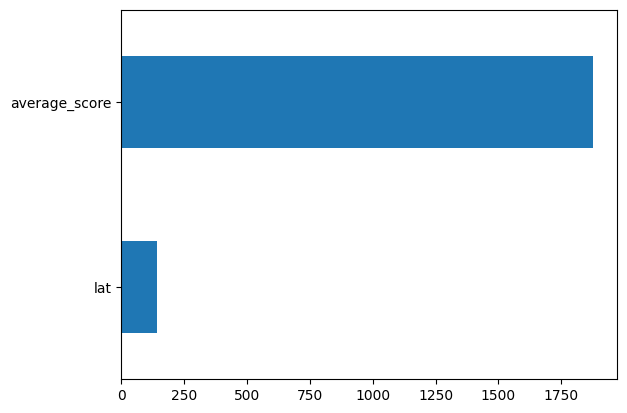

In [16]:
y=y.astype('int')
# хи-квадрат
imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

# По графику важности категориальных признаков мы можем понять, 
# что признак average_score важнее, чем lat

<AxesSubplot: >

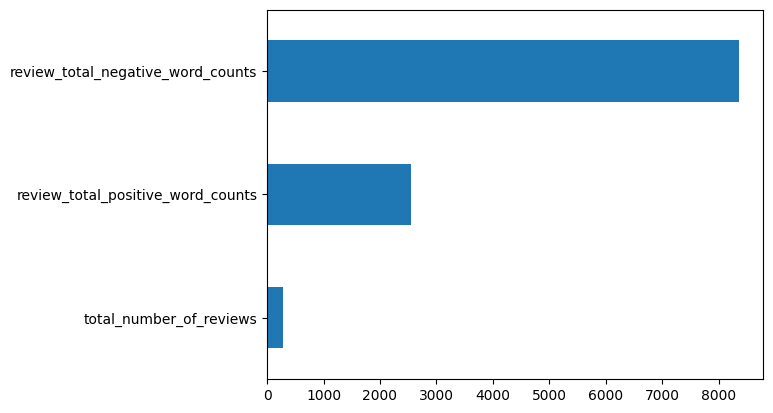

In [19]:
# anova для непрерывных

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')
# По  графику важности категориальных переменных мы можем понять, 
# что признак review_total_negative_word_counts важнее, 
# чем total_number_of_reviews

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, 
    random_state=42)

### Создание и обучение модели
Используем алгоритм  RandomForestRegressor

In [21]:
regr = RandomForestRegressor(n_estimators=100)  # создание

regr.fit(X_train, y_train)  # обучение на тестовых данных
      
y_pred = regr.predict(X_test)  # Предсказанные значения в тестовой выборке


### Оценка качества модели

In [22]:
# Используем метрику MAPE  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.1412880594751921
